Q.1) What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?

Type I Error (False Positive)

- You reject a true null hypothesis.

- Meaning: You think something changed/has an effect, but actually it did not.

- Example: A test says a medicine works, but in reality, it doesn’t.

- Impact: Leads to wrong action or accepting something that is not true.

Type II Error (False Negative)

- You fail to reject a false null hypothesis.

- Meaning: You think nothing changed, but actually there was an effect.

- Example: A test says a medicine doesn’t work, but actually it does.

- Impact: Leads to missed opportunities or not detecting a real effect.

Impact on Decision-Making

- Choosing the significance level (α) controls the chance of Type I error.

- Increasing power (1 − β) reduces Type II error.

- Depending on the situation:

     - Medical trials → Avoid Type I error (approve only safe/effective drugs).

     - Security/Detection systems → Avoid Type II error (don’t miss threats).

Q.2) What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

P-value - The P-value is the probability of getting the observed result (or something more extreme) assuming that the null hypothesis (H₀) is true.

Interpret -

- Small P-value (≤ α)

   → The observed data is very unlikely under H₀.

   → Reject the null hypothesis

- Large P-value (> α)

   → The observed data is likely/normal under H₀.

   → Fail to reject the null hypothesis


- P-value DOES NOT prove H₀ true or false.

- It only tells how compatible the data is with H₀.

Q.3) Explain the difference between a Z-test and a T-test, including when to use each.

Z-test

- Used when sample size is large (n > 30).

- Population standard deviation (σ) is known.

- Data assumed to be normally distributed.

Use:

- Large samples

- Known population variance

- Comparing sample mean to population mean

T-test

- Used when sample size is small (n ≤ 30).

- Population standard deviation is NOT known (use sample SD).

- Data should be approximately normal.

Use:

- Small samples

- Unknown population variance

- Comparing means (one-sample, two-sample, paired)

Q.4) What is a confidence interval, and how does the margin of error influence its width and interpretation?

A **confidence interval** (CI) is a range of values that is likely to contain the true population parameter (mean, proportion, etc.) with a certain confidence level (like 95%).

Example:
95% CI = 50 ± 4 → (46, 54)

- Margin of Error (ME) - Margin of error is the amount added/subtracted from the sample estimate.

Formula (general idea):
ME = critical value × standard error

- Margin of Error Affects the Width

   Larger margin of error → Wider confidence interval → Less precise estimate

   Smaller margin of error → Narrower confidence interval → More precise estimate

- Interpretation

   - A wider CI means more uncertainty about the true value.

   - A narrower CI means more confidence in pinpointing the true value.

Q.5) Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

**Purpose of ANOVA (Analysis of Variance) - ANOVA** is used to compare the means of 3 or more groups to check if at least one group mean is significantly different.

Example: Comparing average marks of students from 3 different classes.

- Assumptions of ANOVA

  - Normality - Data in each group should be approximately normally distributed.

  - Homogeneity of Variance - All groups should have similar variances.

  - Independence - Each observation must be independent of others.

ANOVA Extends Hypothesis Testing :

  - For two groups, we use a t-test.

  - But with three or more groups, doing many t-tests increases error.

  - ANOVA solves this by testing all groups at once using variance comparison.

Hypotheses:

  - H₀: All group means are equal

  - H₁: At least one group mean is different

If ANOVA is significant → follow with post-hoc tests to find which groups differ.

Q.6) Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.



In [1]:
import numpy as np
from scipy import stats

# Sample dataset
data = [52, 50, 49, 51, 53, 54, 52, 48, 50, 51]

# Known population mean
mu0 = 50

# Known population standard deviation (σ)
sigma = 3

# Convert data to numpy array
data = np.array(data)

# Sample mean
xbar = np.mean(data)

# Sample size
n = len(data)

# Perform Z-test manually
z_score = (xbar - mu0) / (sigma / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("Sample Mean  :", xbar)
print("Z-score      :", z_score)
print("P-value      :", p_value)

# Interpretation at α = 0.05
alpha = 0.05
if p_value < alpha:
    print("\nResult: Reject the null hypothesis (Significant difference).")
else:
    print("\nResult: Fail to reject the null hypothesis (No significant difference).")


Sample Mean  : 51.0
Z-score      : 1.0540925533894598
P-value      : 0.29184054514378843

Result: Fail to reject the null hypothesis (No significant difference).


Q.7) Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.



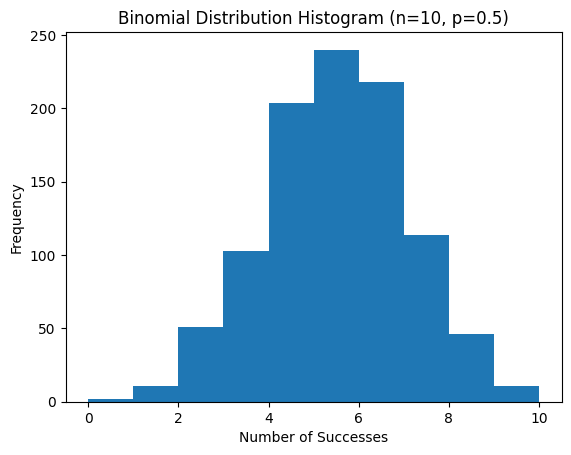

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data from Binomial(n=10, p=0.5)
data = np.random.binomial(n=10, p=0.5, size=1000)

# Plot histogram
plt.hist(data)
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.title("Binomial Distribution Histogram (n=10, p=0.5)")
plt.show()


Q.8) Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.



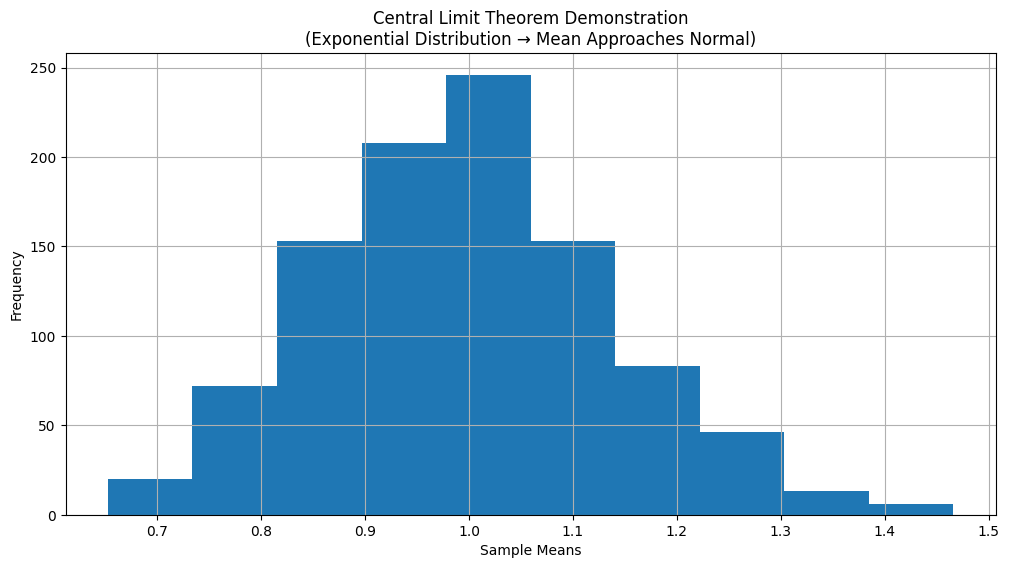

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate multiple samples from a non-normal distribution (Exponential)
np.random.seed(42)             # for same result every time
num_samples = 1000             # number of samples
sample_size = 50               # each sample size

# Generate samples from exponential distribution
samples = np.random.exponential(scale=1.0, size=(num_samples, sample_size))

# Step 2: Compute sample means
sample_means = samples.mean(axis=1)

# Step 3: Plot histogram of the sample means (CLT effect)
plt.figure(figsize=(12,6))
plt.hist(sample_means)
plt.xlabel("Sample Means")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem Demonstration\n(Exponential Distribution → Mean Approaches Normal)")
plt.grid(True)
plt.show()


Q.9) Write a Python function to calculate and visualize the confidence interval for a sample mean.



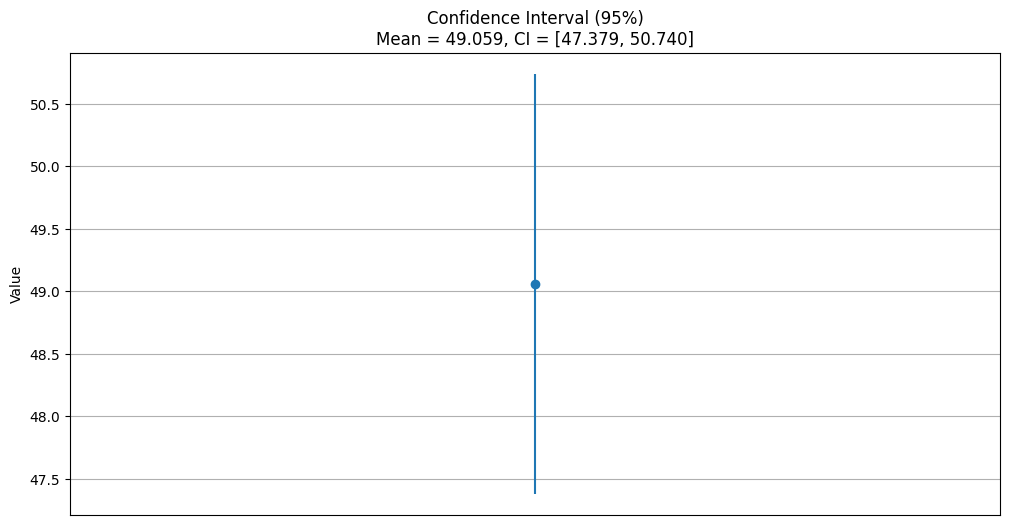

(np.float64(49.05926552074481),
 (np.float64(47.37892590517584), np.float64(50.73960513631378)))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Function to calculate and visualize confidence interval
def plot_confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # standard error of the mean

    # Margin of error
    h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)

    # Lower & upper CI bounds
    lower = mean - h
    upper = mean + h

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.errorbar(1, mean, yerr=h, fmt='o')
    plt.xlim(0, 2)
    plt.xticks([])
    plt.ylabel("Value")
    plt.title(f"Confidence Interval ({int(confidence*100)}%)\nMean = {mean:.3f}, CI = [{lower:.3f}, {upper:.3f}]")
    plt.grid(True)
    plt.show()

    return mean, (lower, upper)

# Example dataset (same used earlier)
np.random.seed(42)
data = np.random.normal(loc=50, scale=5, size=30)

# Run the function
plot_confidence_interval(data)


Q.10) Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.



In [5]:
import numpy as np
from scipy.stats import chisquare

# Observed frequencies (example)
observed = np.array([25, 30, 20, 25])

# Expected frequencies (e.g., uniform distribution)
expected = np.array([25, 25, 25, 25])

# Perform Chi-square Goodness-of-Fit test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square Statistic:", chi_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis.")
    print("The observed distribution is significantly different from the expected distribution.")
else:
    print("\nConclusion: Fail to reject the null hypothesis.")
    print("There is no significant difference; the observed data fits the expected distribution.")


Chi-square Statistic: 2.0
P-value: 0.5724067044708798

Conclusion: Fail to reject the null hypothesis.
There is no significant difference; the observed data fits the expected distribution.


**Explanation of the Test**

- Null Hypothesis (H₀):

   - The observed distribution matches the expected distribution.

- Alternative Hypothesis (H₁):

   - The observed distribution does not match the expected distribution.

**Outcome Interpretation**

  - If p-value < 0.05 → reject H₀

      - The observed frequencies differ significantly from expected frequencies.

  - If p-value ≥ 0.05 → fail to reject H₀

      - The observed data is consistent with the expected distribution.